# Deep learning project

## Kunskapskontroll 2

### Detecting emotion on images or video of human faces.

To start with we use the following dataset from Kaggle:

'Face expression recognition dataset'

LINK:
https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset

Supplemental dataset from :
    
http://mmlab.ie.cuhk.edu.hk/projects/socialrelation/index.html

The project is based on the example from this Github: https://github.com/akmadan/Emotion_Detection_CNN
 and the Youtube video: https://www.youtube.com/watch?v=Bb4Wvl57LIk

## Importing libraries

In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --upgrade pip setuptools

Note: you may need to restart the kernel to use updated packages.


In [24]:
python -v

NameError: name 'python' is not defined

In [4]:
pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [39 lines of output]
  Traceback (most recent call last):
    File "C:\Users\asche\anaconda3\envs\tf-gpu\lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
      parsed = _parse_requirement(requirement_string)
    File "C:\Users\asche\anaconda3\envs\tf-gpu\lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
      return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
    File "C:\Users\asche\anaconda3\envs\tf-gpu\lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
      url, specifier, marker = _parse_requirement_details(tokenizer)
    File "C:\Users\asche\anaconda3\envs\tf-gpu\lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 126, in _parse_requirement_details
      marker = _parse_requirement_marker(
    File "C:\Users\asche\anaconda3\e

In [5]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
import itertools
from collections import defaultdict

# Importing Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import img_to_array,  load_img

from keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator 
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model,Sequential

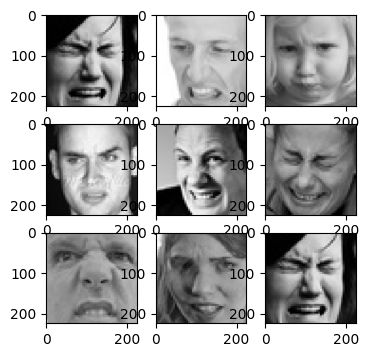

In [7]:
expression = 'disgust'

plt.figure(figsize= (4,4))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img("content/train/"+expression+"/"+
                  os.listdir("content/train/" + expression)[i], target_size=(224, 224))
    plt.imshow(img)   
plt.show()

## Making Training and Validation Data

In [8]:
expressions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

### We need to make training and validation sets. and make sure images are proper size etc.

80% of the images for training and 20% for validation.

In [9]:
train_path = 'content/train'
test_path = 'content/validation'

In [10]:
IMAGE_SIZE = [224, 224]

In [11]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input #preprocesses the input image to align with the preprocessing used for training the VGG16 model on ImageNet data.
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from datetime import datetime
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [12]:
### Test data path.

In [13]:
folders = glob('content/train/*')
print(len(folders))

7


In [14]:
'''
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
'''

# with Data Augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [15]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [16]:

train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [17]:
batch_size = 32

# Define the data generators for training and testing
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input)  # You may or may not use augmentation for testing

# Function to load a smaller dataset for testing
def load_small_dataset(directory, target_size, batch_size, datagen):
    return datagen.flow_from_directory(
        directory,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical')

# Load the smaller dataset for testing
train_set = load_small_dataset(train_path, (224, 224), batch_size, train_datagen)
test_set = load_small_dataset(test_path, (224, 224), batch_size, test_datagen)

# Print information about the loaded dataset
print("Train set info:")
print(train_set)
print("\nTest set info:")
print(test_set)


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Train set info:

Test set info:


# VGG16 model preparation and eda

In [18]:
# Load the VGG16 model
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [19]:
# shape and structure of the input data that should be fed into the model during training or inference. 
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [20]:
# shape and structure of the output data that will be the result.
vgg.output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

### We only want the first layers of the bgg16 model

In [21]:
layers = 10

# Extract the first 10 layers from the base model
desired_layers = vgg.layers[:layers]

# Create a new model with only the desired layers
vgg_partial = Model(inputs=vgg.input, outputs=desired_layers[-1].output)

In [22]:
# Freeze the layers in the partial VGG model (optional)
for layer in vgg_partial.layers:
    layer.trainable = False

### Customized model

In [23]:
# Custom head for classification

#1st CNN layer
custom_head = Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(7, 7, 512))(vgg_partial.output)
custom_head = BatchNormalization()(custom_head)
custom_head = MaxPooling2D(pool_size=(2, 2))(custom_head)
custom_head = Dropout(0.25)(custom_head)

#2nd CNN layer
custom_head = Conv2D(128, (5, 5), padding='same', activation='relu')(custom_head)
custom_head = BatchNormalization()(custom_head)
custom_head = MaxPooling2D(pool_size=(2, 2))(custom_head)
custom_head = Dropout(0.25)(custom_head)

#3rd CNN layer
custom_head = Conv2D(512, (3, 3), padding='same', activation='relu')(custom_head)
custom_head = BatchNormalization()(custom_head)
custom_head = MaxPooling2D(pool_size=(2, 2))(custom_head)
custom_head = Dropout(0.25)(custom_head)

#4th CNN layer
custom_head = Conv2D(512, (3, 3), padding='same', activation='relu')(custom_head)
custom_head = BatchNormalization()(custom_head)
custom_head = MaxPooling2D(pool_size=(2, 2))(custom_head)
custom_head = Dropout(0.25)(custom_head)

# Flatten the output for fully connected layers
custom_head = Flatten()(custom_head)

# Fully connected 1st layer
custom_head = Dense(256, activation='relu')(custom_head)
custom_head = BatchNormalization()(custom_head)
custom_head = Dropout(0.25)(custom_head)

# Fully connected 2nd layer
custom_head = Dense(512, activation='relu')(custom_head)
custom_head = BatchNormalization()(custom_head)
custom_head = Dropout(0.25)(custom_head)

# Last layer
custom_head = Dense(no_of_classes, activation='softmax')(custom_head)


NameError: name 'no_of_classes' is not defined

In [ ]:
no_of_classes = 7
checkpoint = ModelCheckpoint(filepath='hybrid_vgg16_face_emotion_model.h5', verbose=2, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
callbacks = [checkpoint, early_stopping]
start = datetime.now()
adam = Adam(learning_rate=0.0001)  

In [ ]:
# Combine the partial VGG model and the custom head
model = Model(name='hybrid_vgg16_face_emotion_model',inputs=vgg_partial.input, outputs=custom_head)

# Compile the model
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

In [ ]:
epochs = 10

# Train the combined model
history = model.fit(
    train_set,
    validation_data=test_set,
    epochs=epochs,
    steps_per_epoch=len(train_set),
    validation_steps=len(test_set),
    callbacks=callbacks ,
    verbose=1
)

duration = datetime.now() - start
print("Training completed in time: ", duration)

In [ ]:
'''

checkpoint = ModelCheckpoint("./modified_emotion_model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

emotion_model_modified.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])
              
'''

## Plotting Accuracy & Loss

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(model_history.history['accuracy'], label='Training Accuracy')
plt.legend(loc='lower right')
plt.show()